# 포켓몬 데이터를 이용한 실습

* kaggle : https://www.kaggle.com/abcsds/pokemon

### column 살펴보기
* #: 포켓몬 ID
* Name: 포켓몬 이름
* Type 1: 포켓몬의 타입
* Type 2: 몇몇 포켓몬은 타입을 두개 가지고 있는 애들도 있다.
* Total: 포켓몬이 얼마나 강한지에 대한 일반적인 모든 통계의 합
* HP: 포켓몬의 체력
* Attack: 일반 공격의 공격력
* Defense: 일반 공격의 방어력
* SP Atk: 스페셜 어택의 공격력
* SP Def: 스페셜 어택의 방어력
* Speed: 어떤 포켓몬이 먼저 공격할지 결정

## 데이터 가져오기 & EDA

In [1]:
# 라이브러리 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' # 더 높은 해상도로 그래프를 출력

In [4]:
import os
csv_path = os.getenv('HOME')+'/aiffel/pokemon_eda/data/Pokemon.csv'
original_pokemon = pd.read_csv(csv_path)

In [5]:
original_pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [7]:
pokemon = original_pokemon.copy()
print(pokemon.shape) # (800, 13) : 800개의 데이터, 13개의 특성

(800, 13)


In [10]:
legendary = pokemon[pokemon['Legendary']==True].reset_index(drop=True)
print(legendary.shape) # (65, 13)
legendary.head()

(65, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True


In [12]:
ordinary = pokemon[pokemon['Legendary']==False].reset_index(drop=True)
print(ordinary.shape) # (735, 13)
ordinary.head()

(735, 13)


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [13]:
# 결측치 확인
pokemon.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [15]:
print(len(pokemon.columns))
pokemon.columns # Legendary 여부를 예측하는 것이 이번 장 목표

13


Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [21]:
print(f'total = {len(pokemon)}')
len(set(pokemon['#'])) 
# total 개수와 같지 않기 때문에 unique한 데이터로 쓸 수 없음

total = 800


721

In [23]:
len(set(pokemon['Name']))
# total 개수와 같으므로 unique하게 쓸 수 있음.

800

In [26]:
len(list(set(pokemon['Type 1']))), len(list(set(pokemon['Type 2'])))

(18, 19)

In [29]:
set(pokemon['Type 2'])-set(pokemon['Type 1'])
# nan이 type2에 추가로 존재한다.
# 차집합으로 구함

{nan}

In [30]:
types = set(pokemon['Type 1'])
len(types)

18

In [31]:
# 타입을 하나만 가지고 있는 포켓몬
# pandas의 isna() 사용
pokemon['Type 2'].isna().sum()

386

##### pandas isna
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.isna.html

* nan 값을 추출
* nan이면 true를 return

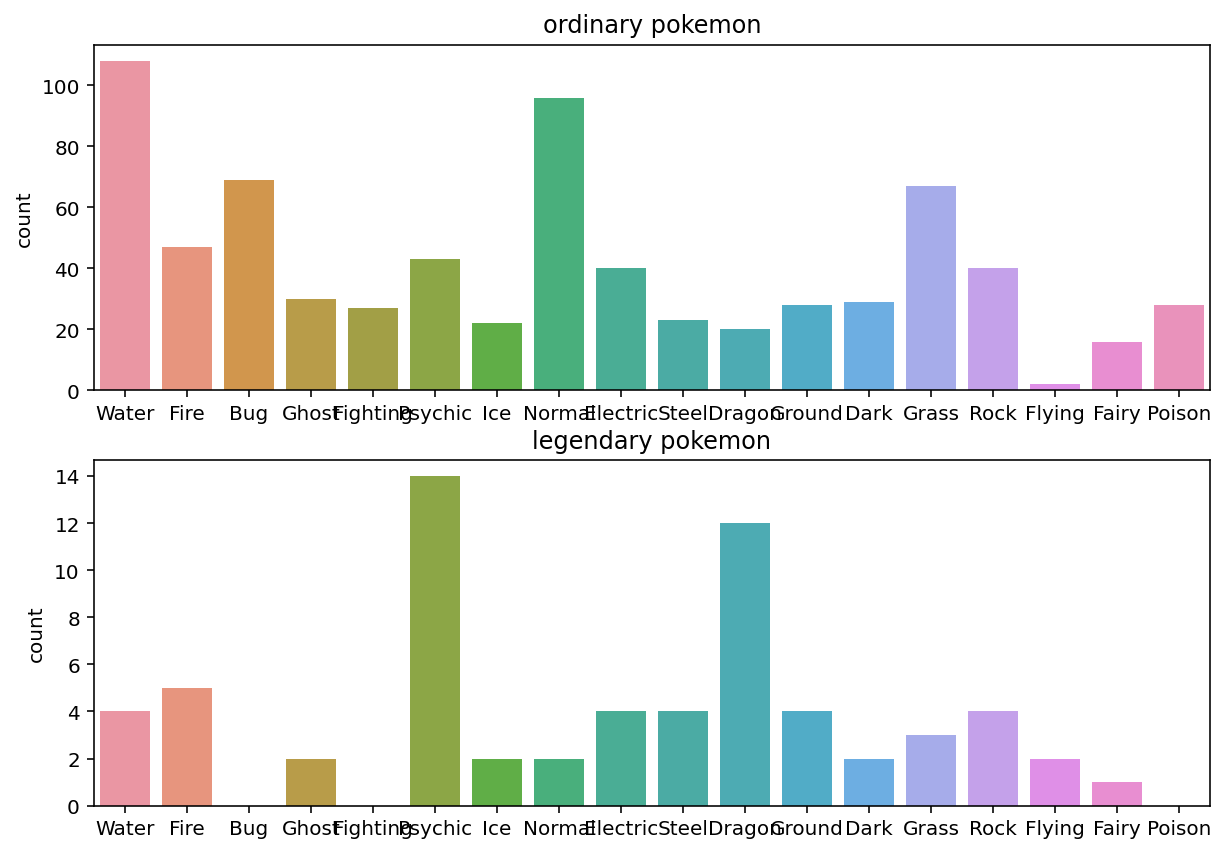

In [34]:
# type 1의 데이터 분포
plt.figure(figsize=(10,7))

plt.subplot(211)
sns.countplot(data=ordinary, x='Type 1', order=types).set_xlabel('')
plt.title('ordinary pokemon')

plt.subplot(212)
sns.countplot(data=legendary, x='Type 1', order=types).set_xlabel('')
plt.title('legendary pokemon')

plt.show()

In [37]:
pd.pivot_table(pokemon, index='Type 1', values='Legendary').sort_values(by=['Legendary'], ascending=False)
# legendary 비율이 가장 높은 속성은 flying
# flying 타입인 전체 포켓몬 중 legendary 비율이 많다는 의미

,Legendary
Type 1,
Flying,0.500000
Dragon,0.375000
Psychic,0.245614
Steel,0.148148
Ground,0.125000
Fire,0.096154
Electric,0.090909
Rock,0.090909
Ice,0.083333


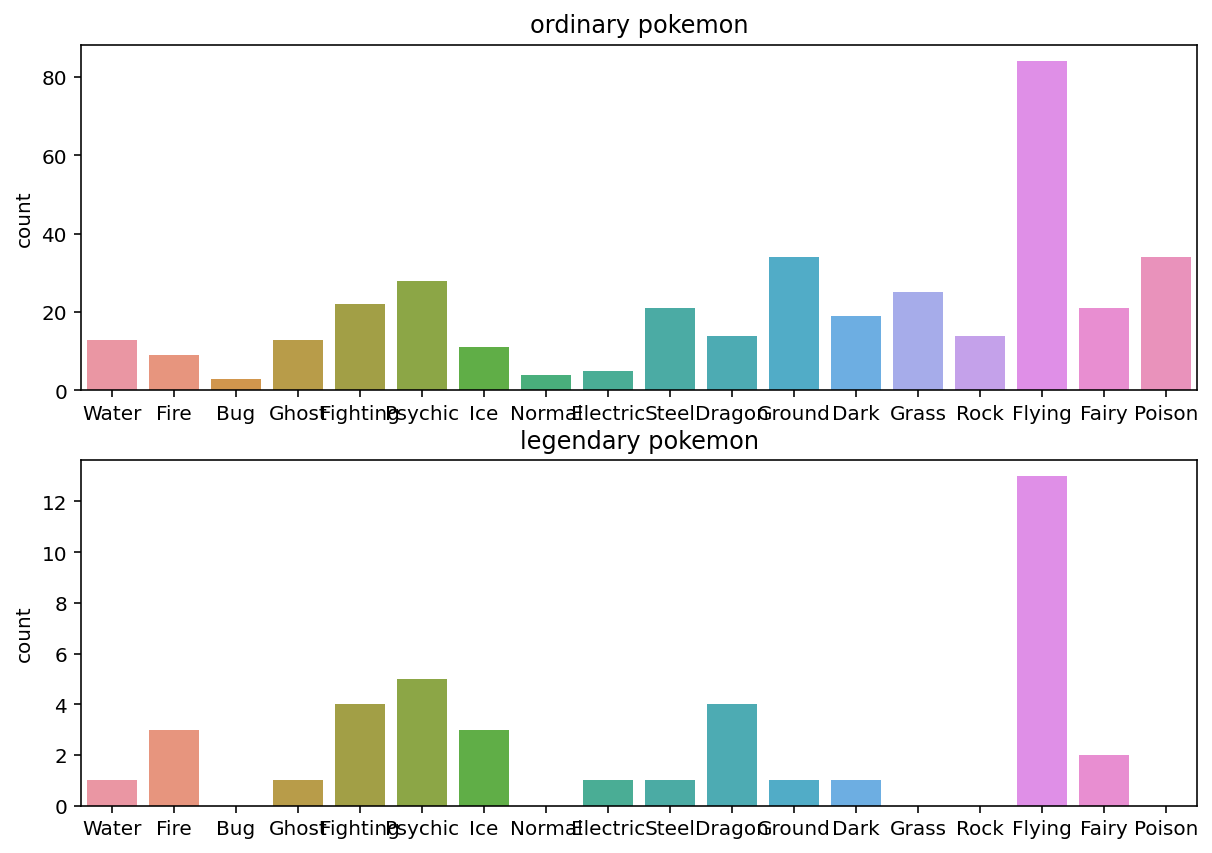

In [39]:
# type 2의 데이터 분포
# countplot에서는 결측치인 Nan은 자동으로 제외
plt.figure(figsize=(10,7))

plt.subplot(211)
sns.countplot(data=ordinary, x='Type 2', order=types).set_xlabel('')
plt.title('ordinary pokemon')

plt.subplot(212)
sns.countplot(data=legendary, x='Type 2', order=types).set_xlabel('')
plt.title('legendary pokemon')

plt.show()

In [40]:
pd.pivot_table(pokemon, index='Type 2', values='Legendary').sort_values(by=['Legendary'], ascending=False)

,Legendary
Type 2,
Fire,0.250000
Dragon,0.222222
Ice,0.214286
Electric,0.166667
Fighting,0.153846
Psychic,0.151515
Flying,0.134021
Fairy,0.086957
Water,0.071429


결론 : Legendary 타입의 포켓몬의 비율이 높은 타입1=flying, 타입2=fire

In [41]:
# 스탯 분석
stats = ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']

In [51]:
print(f'#0 pokemon : {pokemon.loc[0,"Name"]}')
print(f'total :{pokemon.loc[0,"Total"]}')
print(f'stats :{list(pokemon.loc[0,stats])}')
print(f'result sum : {sum(list(pokemon.loc[0,stats]))}')

#0 pokemon : Bulbasaur
total :318
stats :[45, 49, 49, 65, 65, 45]
result sum : 318


In [53]:
sum(pokemon['Total'].values == pokemon[stats].values.sum(axis=1))
# 모든 데이터가 stats의 총합 = Total 이라는 것을 확인

800

##### pandas sum()
axis 기준에 맞는 값들의 합을 반환
* axis 0 = index
* axis 1 = column

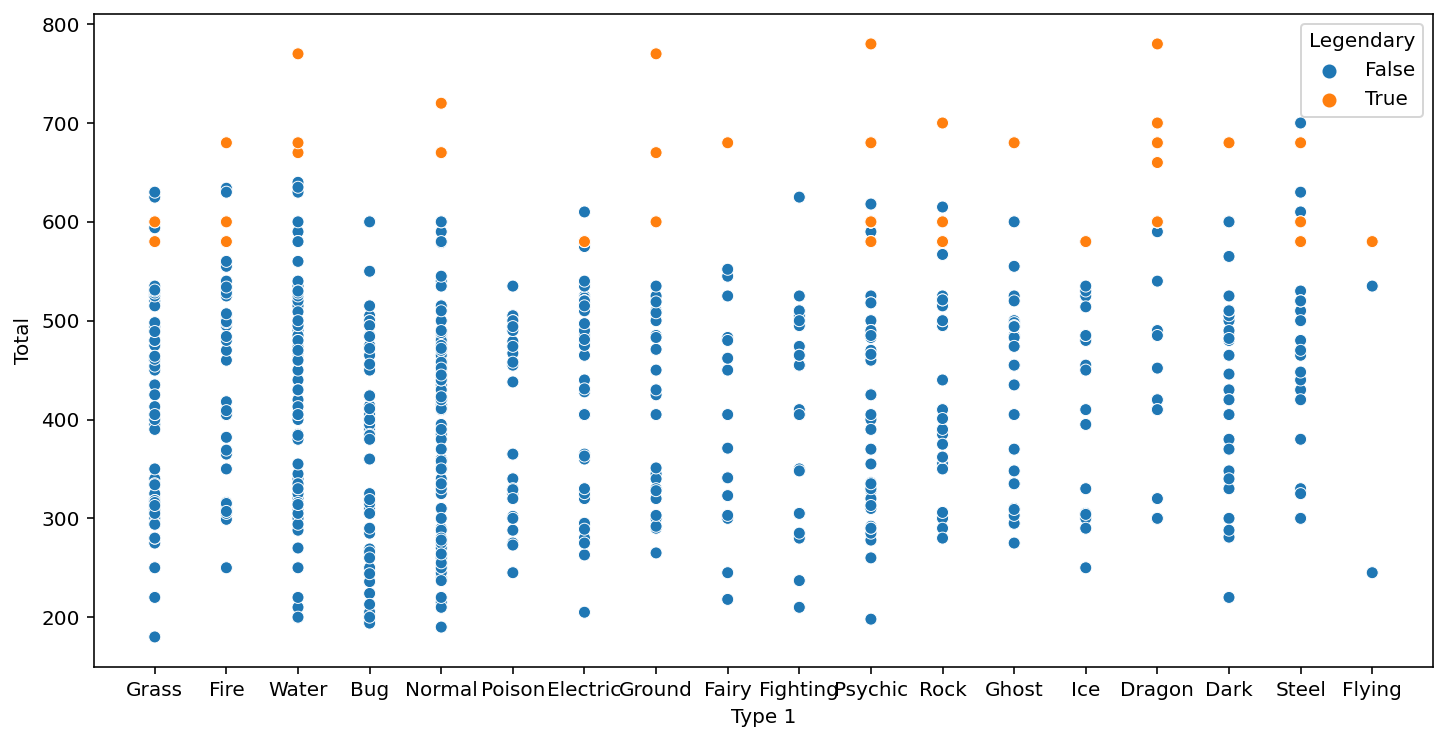

In [55]:
# Total값과 Legendary의 관계
fig, ax = plt.subplots()
fig.set_size_inches(12, 6)

sns.scatterplot(data=pokemon, x='Type 1', y='Total', hue='Legendary')
plt.show()

# Legendary인 포켓몬이 total이 대부분 더 높다는 것을 발견할 수 있다.

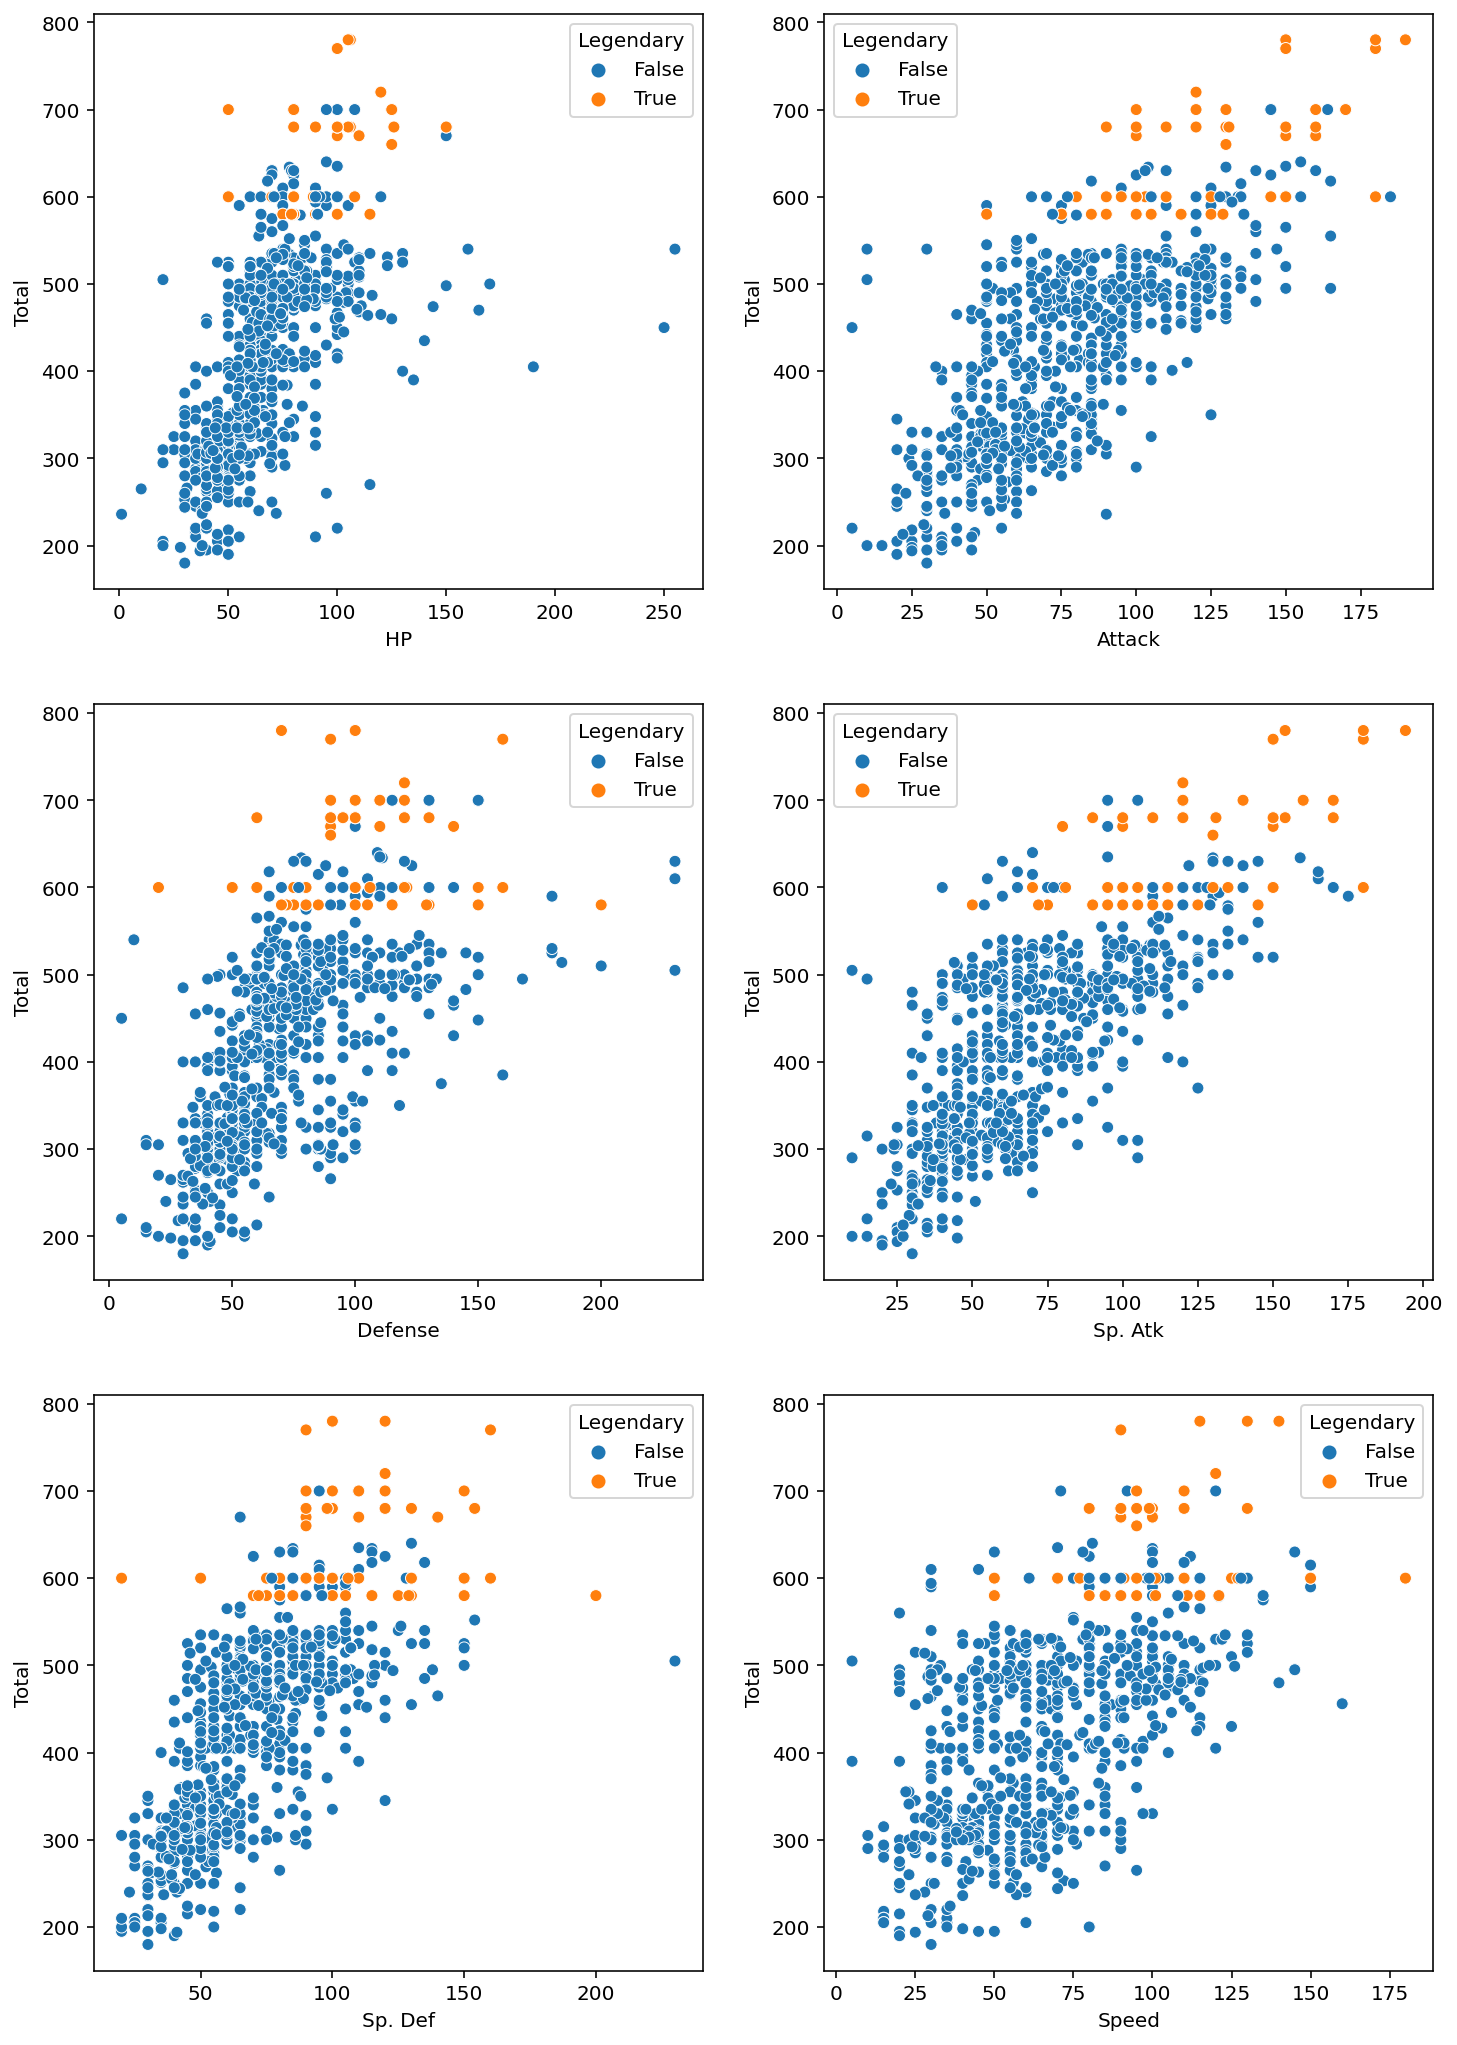

In [58]:
# 세부 스탯별 분포
figure, ((ax1, ax2), (ax3,ax4), (ax5,ax6)) = plt.subplots(nrows=3, ncols=2)
figure.set_size_inches(12,18)

sns.scatterplot(data=pokemon, y='Total', x='HP', hue='Legendary', ax=ax1)
sns.scatterplot(data=pokemon, y='Total', x='Attack', hue='Legendary', ax=ax2)
sns.scatterplot(data=pokemon, y='Total', x='Defense', hue='Legendary', ax=ax3)
sns.scatterplot(data=pokemon, y='Total', x='Sp. Atk', hue='Legendary', ax=ax4)
sns.scatterplot(data=pokemon, y='Total', x='Sp. Def', hue='Legendary', ax=ax5)
sns.scatterplot(data=pokemon, y='Total', x='Speed', hue='Legendary', ax=ax6)

plt.show()
# HP, Defense, Sp. Def : Total에 비례하지 않는다.
# Attack, Sp. Atk, Speed : Total에 비례한다.

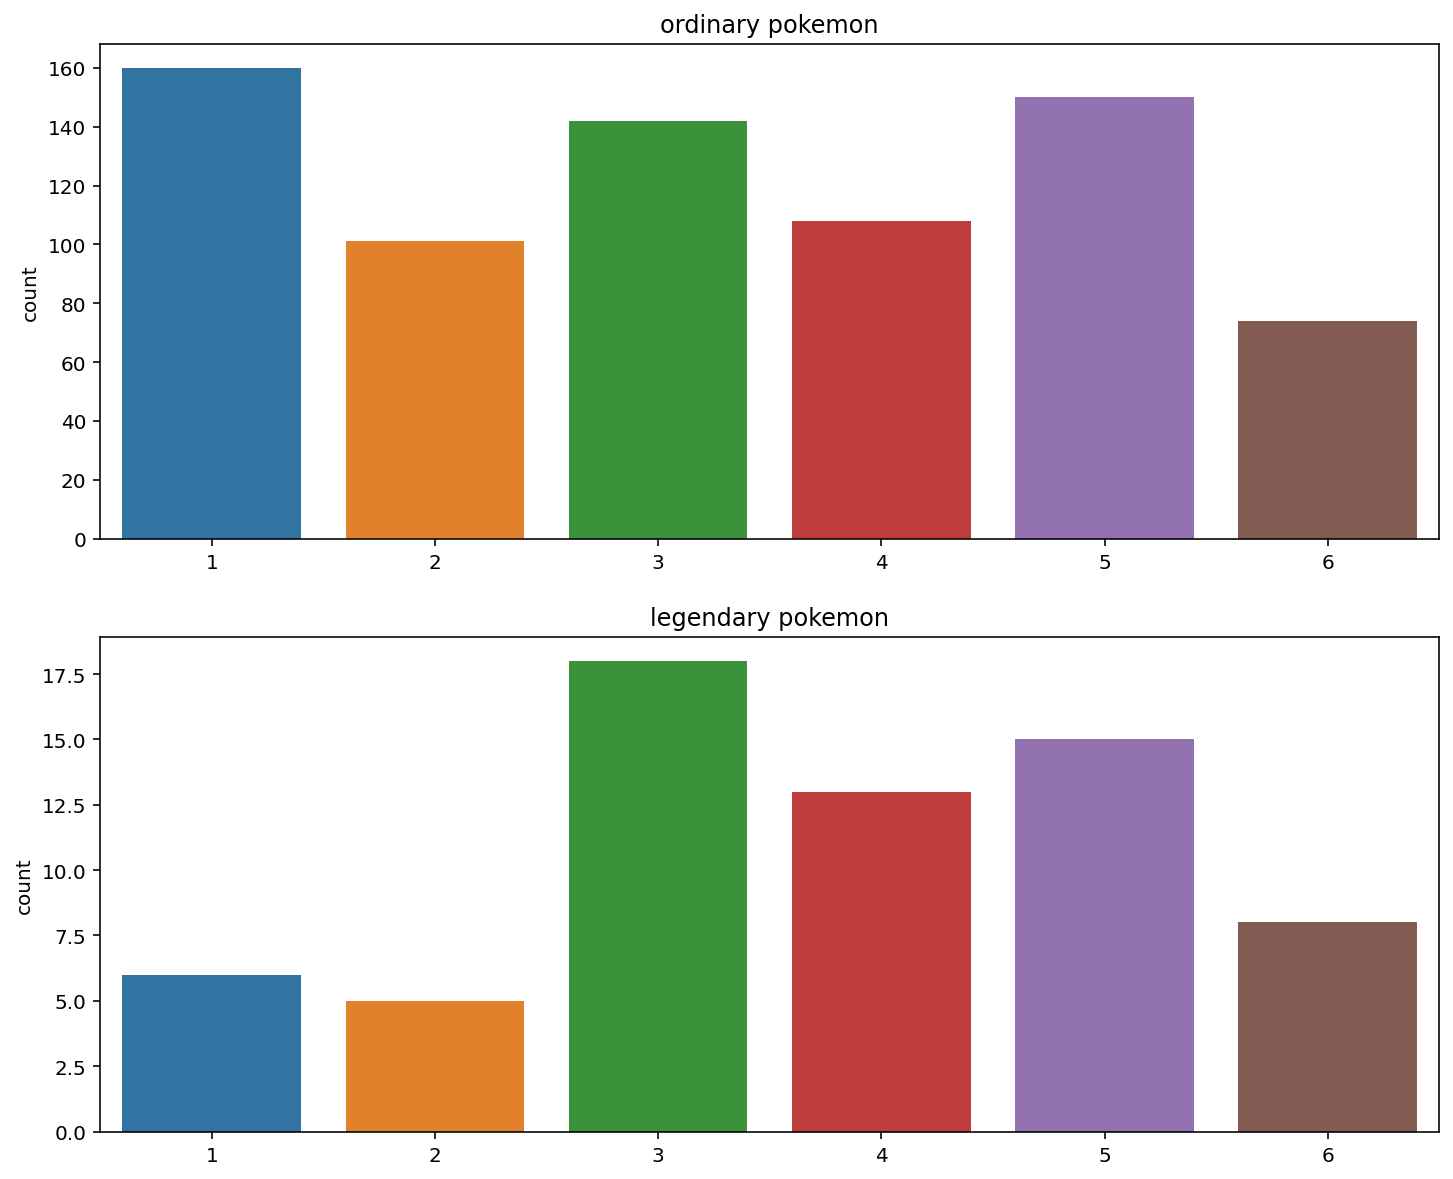

In [61]:
# 세대
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(data=ordinary, x='Generation').set_xlabel('')
plt.title('ordinary pokemon')
plt.subplot(212)
sns.countplot(data=legendary, x='Generation').set_xlabel('')
plt.title('legendary pokemon')

plt.show()


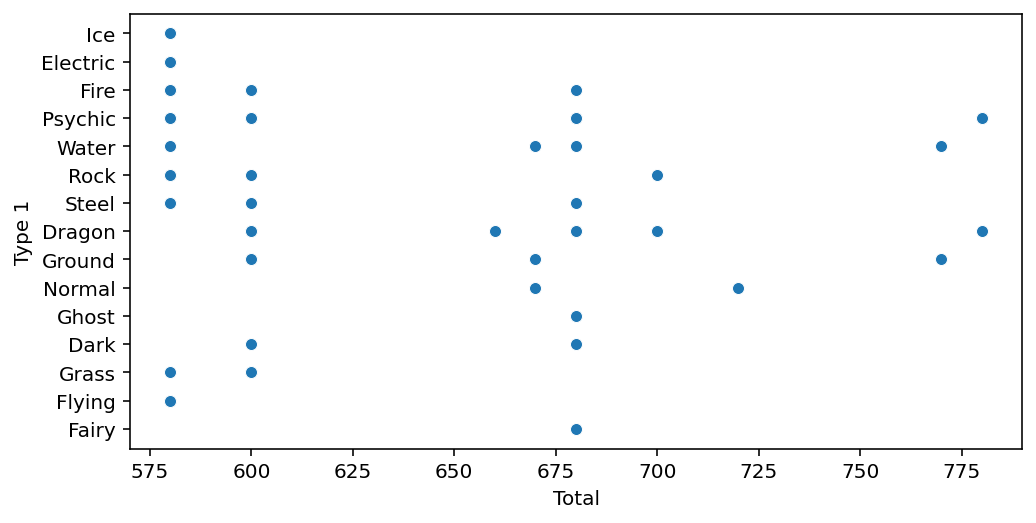

In [62]:
# legendary pokemon의 Total 값
fig, ax = plt.subplots()
fig.set_size_inches(8,4)

sns.scatterplot(data=legendary, y='Type 1', x='Total')
plt.show()

In [64]:
# 산개한 것이 아닌 특정 값에 모여있다.
sorted(list(set(legendary['Total'])))

[580, 600, 660, 670, 680, 700, 720, 770, 780]

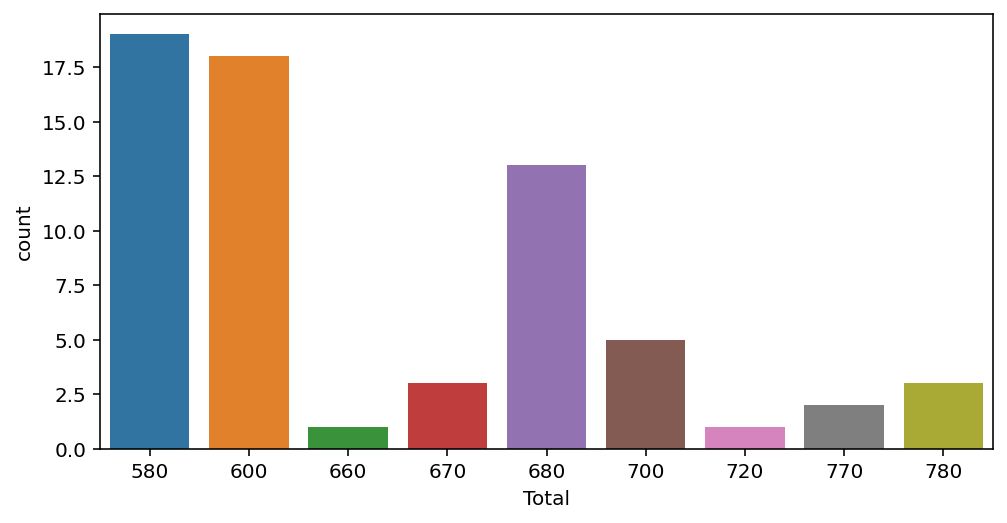

In [65]:
# total값에 대한 전설 포켓몬 수
fig, ax = plt.subplots()
fig.set_size_inches(8, 4)

sns.countplot(data=legendary, x='Total')
plt.show()

In [69]:
# ordinary 포켓몬에 대한 total값 분포
print(sorted(list(set(ordinary['Total']))))
print('count:',len(sorted(list(set(ordinary['Total'])))))

[180, 190, 194, 195, 198, 200, 205, 210, 213, 215, 218, 220, 224, 236, 237, 240, 244, 245, 250, 251, 253, 255, 260, 262, 263, 264, 265, 266, 269, 270, 273, 275, 278, 280, 281, 285, 288, 289, 290, 292, 294, 295, 299, 300, 302, 303, 304, 305, 306, 307, 308, 309, 310, 313, 314, 315, 316, 318, 319, 320, 323, 325, 328, 329, 330, 334, 335, 336, 340, 341, 345, 348, 349, 350, 351, 352, 355, 358, 360, 362, 363, 365, 369, 370, 371, 375, 380, 382, 384, 385, 390, 395, 400, 401, 405, 409, 410, 411, 413, 414, 415, 418, 420, 423, 424, 425, 428, 430, 431, 435, 438, 440, 442, 445, 446, 448, 450, 452, 454, 455, 456, 458, 460, 461, 462, 464, 465, 466, 467, 468, 470, 471, 472, 473, 474, 475, 479, 480, 481, 482, 483, 484, 485, 487, 488, 489, 490, 494, 495, 497, 498, 499, 500, 505, 507, 508, 509, 510, 514, 515, 518, 519, 520, 521, 523, 525, 528, 530, 531, 534, 535, 540, 545, 550, 552, 555, 560, 565, 567, 575, 579, 580, 590, 594, 600, 610, 615, 618, 625, 630, 634, 635, 640, 670, 700]
count: 195


In [75]:
print(sorted(list(set(legendary['Total'])-set(ordinary['Total']))))

[660, 680, 720, 770, 780]


* conclusion : 전설 포켓몬의 Total 값은 다양하지 않다.
* 일반 포켓몬은 [660, 680, 720, 770, 780] 값들을 가지고 있지 않다.

In [78]:
n1, n2, n3, n4, n5 = legendary[3:6], legendary[14:24], legendary[25:29], legendary[46:50], legendary[52:57]
names = pd.concat([n1, n2, n3, n4, n5]).reset_index(drop=True)
names
# 특정 단어가 들어간 이름들이 있다.

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
1,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
2,150,MewtwoMega Mewtwo Y,Psychic,NaN,780,106,150,70,194,120,140,1,True
3,380,Latias,Dragon,Psychic,600,80,80,90,110,130,110,3,True
4,380,LatiasMega Latias,Dragon,Psychic,700,80,100,120,140,150,110,3,True
5,381,Latios,Dragon,Psychic,600,80,90,80,130,110,110,3,True
6,381,LatiosMega Latios,Dragon,Psychic,700,80,130,100,160,120,110,3,True
7,382,Kyogre,Water,NaN,670,100,100,90,150,140,90,3,True
8,382,KyogrePrimal Kyogre,Water,NaN,770,100,150,90,180,160,90,3,True
9,383,Groudon,Ground,NaN,670,100,150,140,100,90,90,3,True


In [79]:
formes = names[13:23]
formes
# forme가 들어가는 경우도 존재

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
13,386,DeoxysNormal Forme,Psychic,NaN,600,50,150,50,150,50,150,3,True
14,386,DeoxysAttack Forme,Psychic,NaN,600,50,180,20,180,20,150,3,True
15,386,DeoxysDefense Forme,Psychic,NaN,600,50,70,160,70,160,90,3,True
16,386,DeoxysSpeed Forme,Psychic,NaN,600,50,95,90,95,90,180,3,True
17,641,TornadusIncarnate Forme,Flying,NaN,580,79,115,70,125,80,111,5,True
18,641,TornadusTherian Forme,Flying,NaN,580,79,100,80,110,90,121,5,True
19,642,ThundurusIncarnate Forme,Electric,Flying,580,79,115,70,125,80,111,5,True
20,642,ThundurusTherian Forme,Electric,Flying,580,79,105,70,145,80,101,5,True
21,645,LandorusIncarnate Forme,Ground,Flying,600,89,125,90,115,80,101,5,True
22,645,LandorusTherian Forme,Ground,Flying,600,89,145,90,105,80,91,5,True


In [80]:
legendary["name_count"] = legendary["Name"].apply(lambda i: len(i))
ordinary["name_count"] = ordinary["Name"].apply(lambda i: len(i))

In [82]:
legendary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True,8
1,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True,6
2,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True,7
3,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True,6
4,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True,19


In [83]:
ordinary.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


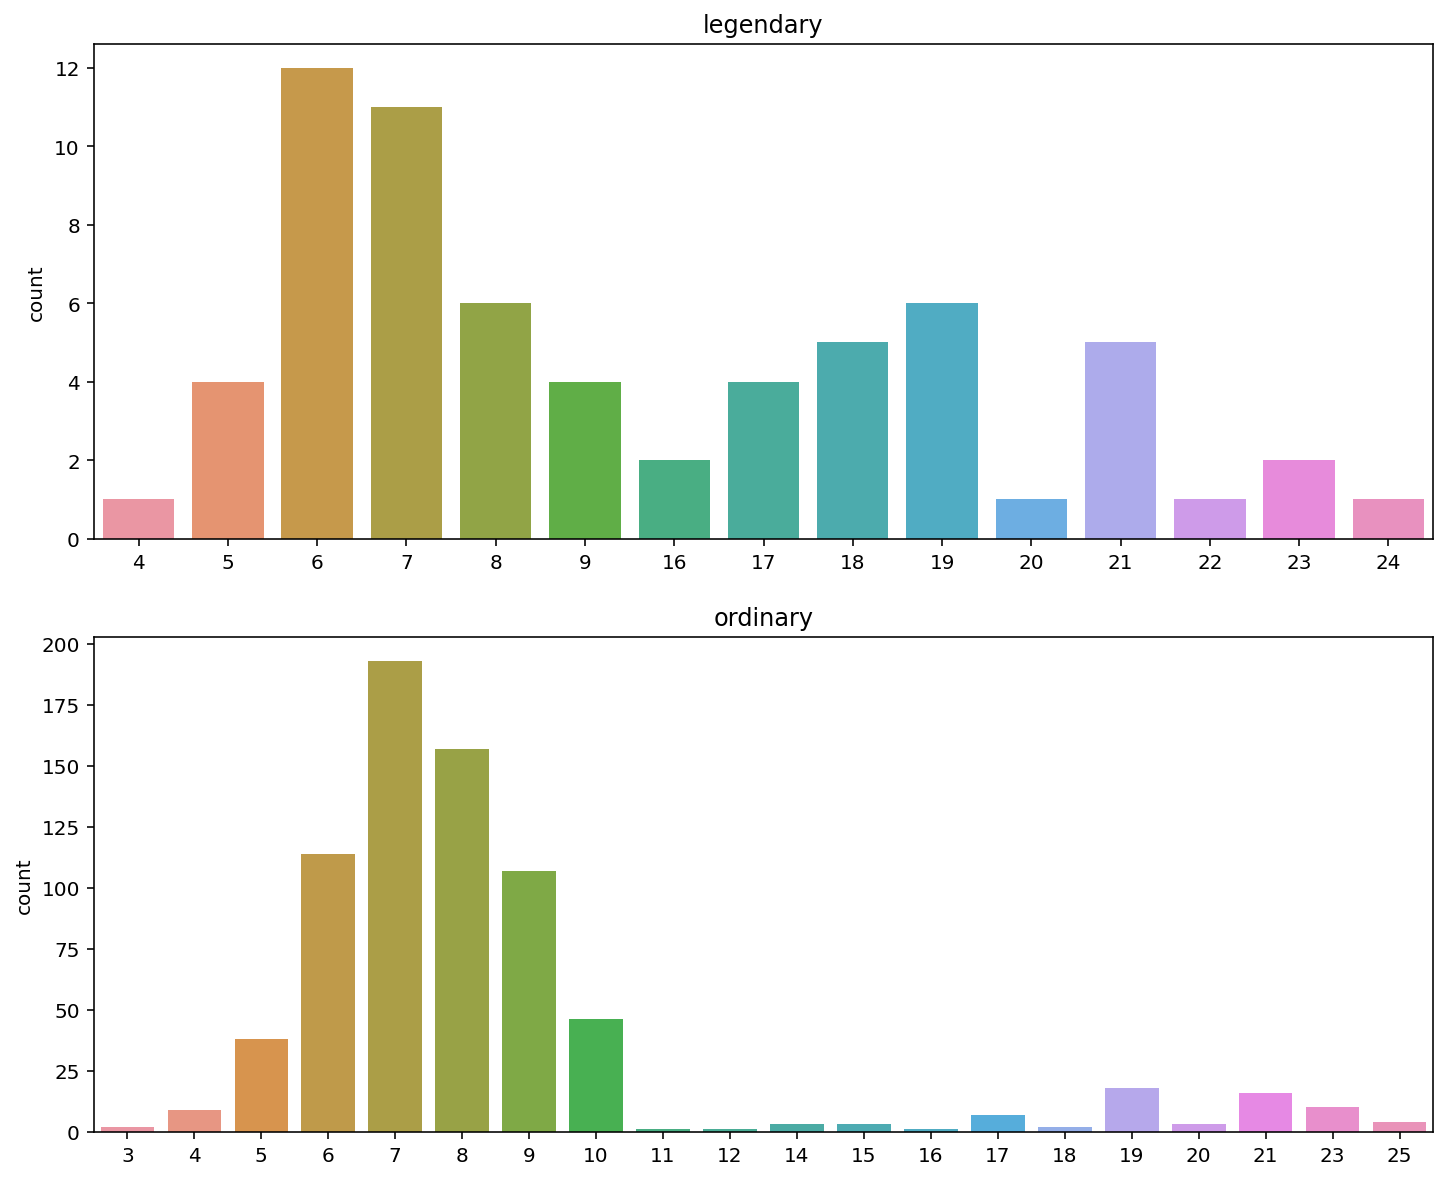

In [86]:
# name_count 특징 시각화
# result : 전설 포켓몬은 이름 길이가 16자 이상인 포켓몬이 많음
# 일반 포켓몬은 10자 이상 이름을 가진 포켓몬이 적음
plt.figure(figsize=(12,10))
plt.subplot(211)
sns.countplot(data=legendary, x='name_count').set_xlabel('')
plt.title('legendary')
plt.subplot(212)
sns.countplot(data=ordinary, x='name_count').set_xlabel('')
plt.title('ordinary')
plt.show()

In [88]:
print(round(len(legendary[legendary['name_count']>9])/len(legendary) * 100, 2), '%')

41.54 %


In [89]:
print(round(len(ordinary[ordinary['name_count']>9])/len(ordinary) * 100, 2), '%')

15.65 %


result :    
1. 특정 단어가 들어간 이름들은 전설이다
2. 전설은 긴 이름을 가질 확률이 높다.

## 데이터 전처리

### 이름 전처리

In [90]:
# pokemon에 이름 길이를 가지는 컬럼 추가
pokemon['name_count'] = pokemon['Name'].apply(lambda i: len(i))
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10


In [91]:
# 이름의 길이가 10자 이상이면 True인 컬럼 추가
pokemon['long_name'] = pokemon['name_count'] >= 10
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,9,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,7,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,8,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,21,True
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,10,True


In [96]:
# 이름에 자주 쓰이는 토큰 추출
# 1. 이름에 알파벳이 들어간 경우
# 띄어쓰기를 없앤다.
pokemon["Name_nospace"] = pokemon["Name"].apply(lambda i: i.replace(" ", ""))
pokemon.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True,7,False,Diancie
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True,19,True,DiancieMegaDiancie
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True,19,True,HoopaHoopaConfined
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True,18,True,HoopaHoopaUnbound
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True,9,False,Volcanion


In [107]:
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i: i.isalpha())
print(f"length:{len(pokemon[pokemon['name_isalpha']==False])}")
pokemon[pokemon['name_isalpha']==False]

length:7


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


##### pandas isalpha
알파벳만으로 이루어졌는지 확인한다. 알파벳이 아닌 것이 있나면 False를 반환

In [106]:
# 알파벳이 안들어간 녀석들을 문자로 바꿔준다.
pokemon = pokemon.replace(to_replace="Nidoran♀", value="Nidoran X")
pokemon = pokemon.replace(to_replace="Nidoran♂", value="Nidoran Y")
pokemon = pokemon.replace(to_replace="Farfetch'd", value="Farfetchd")
pokemon = pokemon.replace(to_replace="Mr. Mime", value="Mr Mime")
pokemon = pokemon.replace(to_replace="Porygon2", value="Porygon")
pokemon = pokemon.replace(to_replace="Ho-oh", value="Ho Oh")
pokemon = pokemon.replace(to_replace="Mime Jr.", value="Mime Jr")
pokemon = pokemon.replace(to_replace="Porygon-Z", value="Porygon Z")
pokemon = pokemon.replace(to_replace="Zygarde50% Forme", value="Zygarde Forme")

pokemon.loc[[34, 37, 90, 131, 252, 270, 487, 525, 794]]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,name_count,long_name,Name_nospace,name_isalpha
34,29,Nidoran X,Poison,NaN,275,55,47,52,40,40,41,1,False,8,False,Nidoran X,False
37,32,Nidoran Y,Poison,NaN,273,46,57,40,40,40,50,1,False,8,False,Nidoran Y,False
90,83,Farfetchd,Normal,Flying,352,52,65,55,58,62,60,1,False,10,True,Farfetchd,False
131,122,Mr Mime,Psychic,Fairy,460,40,45,65,100,120,90,1,False,8,False,Mr.Mime,False
252,233,Porygon,Normal,NaN,515,85,80,90,105,95,60,2,False,8,False,Porygon,False
270,250,Ho Oh,Fire,Flying,680,106,130,90,110,154,90,2,True,5,False,Ho Oh,False
487,439,Mime Jr,Psychic,Fairy,310,20,25,45,70,90,60,4,False,8,False,MimeJr.,False
525,474,Porygon Z,Normal,NaN,535,85,80,70,135,75,90,4,False,9,False,Porygon Z,False
794,718,Zygarde Forme,Dragon,Ground,600,108,100,121,81,95,95,6,True,16,True,Zygarde50%Forme,False


In [112]:
# 다시 no_space
pokemon['Name_nospace'] = pokemon['Name'].apply(lambda i: i.replace(" ",""))
pokemon['name_isalpha'] = pokemon['Name_nospace'].apply(lambda i: i.isalpha())
len(pokemon[pokemon['name_isalpha']==False])

0

#### 이름을 토큰화
문자열을 처리할 때는 정규표현식 기법이 사용된다.
##### 정규표현식이란?
* https://wikidocs.net/4308

In [113]:
# 정규식 패키지
import re

In [114]:
# 예시
temp = 'ChoiHazel' # 대문자로 시작해 소문자로 끝나는 토큰으로 분리
tokens = re.findall('[A-Z][a-z]*',temp)
tokens

['Choi', 'Hazel']

In [116]:
# 정규표현식으로 이름을 자르는 함수
def tokenize(name):
    name_split = name.split(" ")
    
    tokens = []
    for part_name in name_split:
        a = re.findall('[A-Z][a-z]*',part_name)
        tokens.extend(a)
    return np.array(tokens)

In [117]:
# tokeniza함수 테스트
print(tokenize('CharizardMege ChariZard X'))

['Charizard' 'Mege' 'Chari' 'Zard' 'X']


In [126]:
# 전설 포켓몬 데이터 셋에서 이름에 사용된 토큰을 추출
all_tokens = list(legendary['Name'].apply(tokenize).values)
token_set=[]
for token in all_tokens:
    token_set.extend(token)

print(len(set(token_set)))
print(token_set)

65
['Articuno', 'Zapdos', 'Moltres', 'Mewtwo', 'Mewtwo', 'Mega', 'Mewtwo', 'X', 'Mewtwo', 'Mega', 'Mewtwo', 'Y', 'Raikou', 'Entei', 'Suicune', 'Lugia', 'Ho', 'Regirock', 'Regice', 'Registeel', 'Latias', 'Latias', 'Mega', 'Latias', 'Latios', 'Latios', 'Mega', 'Latios', 'Kyogre', 'Kyogre', 'Primal', 'Kyogre', 'Groudon', 'Groudon', 'Primal', 'Groudon', 'Rayquaza', 'Rayquaza', 'Mega', 'Rayquaza', 'Jirachi', 'Deoxys', 'Normal', 'Forme', 'Deoxys', 'Attack', 'Forme', 'Deoxys', 'Defense', 'Forme', 'Deoxys', 'Speed', 'Forme', 'Uxie', 'Mesprit', 'Azelf', 'Dialga', 'Palkia', 'Heatran', 'Regigigas', 'Giratina', 'Altered', 'Forme', 'Giratina', 'Origin', 'Forme', 'Darkrai', 'Shaymin', 'Land', 'Forme', 'Shaymin', 'Sky', 'Forme', 'Arceus', 'Victini', 'Cobalion', 'Terrakion', 'Virizion', 'Tornadus', 'Incarnate', 'Forme', 'Tornadus', 'Therian', 'Forme', 'Thundurus', 'Incarnate', 'Forme', 'Thundurus', 'Therian', 'Forme', 'Reshiram', 'Zekrom', 'Landorus', 'Incarnate', 'Forme', 'Landorus', 'Therian', 'Form

##### Counter class
개수 세는데 특화된 클래스. most_common으로 자주 나타난 내역을 집계

In [136]:
from collections import Counter

# most_common(n) : 가장 많이 나타나는 top 10 을 추출
most_common = Counter(token_set).most_common(10)
most_common

[('Forme', 15),
 ('Mega', 6),
 ('Mewtwo', 5),
 ('Kyurem', 5),
 ('Deoxys', 4),
 ('Hoopa', 4),
 ('Latias', 3),
 ('Latios', 3),
 ('Kyogre', 3),
 ('Groudon', 3)]

In [138]:
# 토큰이 이름에 있는지 없는지 여부 나타내는 컬럼
# str.contains : 문자 포함여부를 확인
for token, _ in most_common:
    pokemon[token] = pokemon['Name'].str.contains(token)
    
pokemon.head(10)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,...,Forme,Mega,Mewtwo,Kyurem,Deoxys,Hoopa,Latias,Latios,Kyogre,Groudon
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,False,False,False,False,False,False,False,False,False,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,False,False,False,False,False,False,False,False,False,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,False,False,False,False,False,False,False,False,False,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,...,False,True,False,False,False,False,False,False,False,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,False,False,False,False,False,False,False,False,False,False
5,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,False,False,False,False,False,False,False,False,False,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,...,False,False,False,False,False,False,False,False,False,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,...,False,True,False,False,False,False,False,False,False,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,...,False,True,False,False,False,False,False,False,False,False
9,7,Squirtle,Water,NaN,314,44,48,65,50,64,...,False,False,False,False,False,False,False,False,False,False


### 타입 전처리
* 범주형 데이터 전처리.
* 주의할 점은 NaN인 Type2가 있다는 것.

##### 범주형 데이터를 처리하는 방법
* https://machinelearningmastery.com/why-one-hot-encode-data-in-machine-learning/
* 범주형 데이터를 숫자형 데이터로 변환하는 방법
    1. Integer Encoding
        범주마다 숫자를 지정
    2. One-Hot Encoding
        범주마다 컬럼을 만들어 맞으면 1, 틀리면 0으로 지정

In [150]:
types = list(types)

In [152]:
# 여기서는 원-핫 인코딩으로 전처리
for t in types:
    pokemon[t] = (pokemon['Type 1'] == t) | (pokemon['Type 2'] == t)

pokemon[[["Type 1", "Type 2"] + types][0]].head()

,Type 1,Type 2,Water,Fire,Bug,Ghost,Fighting,Psychic,Ice,Normal,Electric,Steel,Dragon,Ground,Dark,Grass,Rock,Flying,Fairy,Poison
0,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
1,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
2,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
3,Grass,Poison,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True
4,Fire,NaN,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


### 베이스라인 모델만들기
* 가장 기초적인 방법으로 만든 모델.
* 성능 하한선을 제공해 만든 모데르이 방향성을 잡아준다.

In [155]:
original_pokemon.shape

(800, 13)

In [158]:
original_pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [161]:
features = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
target = 'Legendary'

In [162]:
X = original_pokemon[features]
X.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
0,318,45,49,49,65,65,45,1
1,405,60,62,63,80,80,60,1
2,525,80,82,83,100,100,80,1
3,625,80,100,123,122,120,80,1
4,309,39,52,43,60,50,65,1


In [163]:
y = original_pokemon[target]
y.head()

0    False
1    False
2    False
3    False
4    False
Name: Legendary, dtype: bool

In [165]:
# 훈련 데이터와 학습 데이터로 분리
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(600, 8) (600,)
(200, 8) (200,)


### 의사결정트리로 학습시키기

In [166]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=25)

In [168]:
# 훈련데이터로 모델 학습
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [171]:
# 예측 결과 확인
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[183,   3],
       [  5,   9]])

##### confusion_matrix
분류 모델이 정확한지 평가하는 오차행렬
![image](https://user-images.githubusercontent.com/63278762/125023696-5d5f5600-e0ba-11eb-9557-9e15a03ddc33.png)

* Positive => Legendary=True
* Negative => Legebdary=False

* https://manisha-sirsat.blogspot.com/2019/04/confusion-matrix.html

In [170]:
(9+183)/(183+3+5+9)

0.96

In [172]:
# 애초에 전설포켓몬은 65마리였고 나머지 735마리는 일반포켓몬이었다.
# 정확도로 모델 성능 평가가 의미가 없다.

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.97      0.98      0.98       186
        True       0.75      0.64      0.69        14

    accuracy                           0.96       200
   macro avg       0.86      0.81      0.84       200
weighted avg       0.96      0.96      0.96       200



##### recall
https://sumniya.tistory.com/26
* Recall : 실제 True인 것 중 모델이 True라고 예측한 모델
$$Recall=\frac{TN}{FN+TN}$$
* Recall이 높다는 것은 분모에 있는 FN값이 높다는 것을 의미한다.

## 피쳐 엔지니어링

In [173]:
print(pokemon.columns)

Index(['#', 'Name', 'Type 1', 'Type 2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation', 'Legendary', 'name_count',
       'long_name', 'Name_nospace', 'name_isalpha', 'Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Water', 'Fire', 'Bug', 'Ghost', 'Fighting', 'Psychic', 'Ice', 'Normal',
       'Electric', 'Steel', 'Dragon', 'Ground', 'Dark', 'Grass', 'Rock',
       'Flying', 'Fairy', 'Poison'],
      dtype='object')


In [176]:
# 문자열 컬럼이나 전처리할때 사용했던 컬럼을 제외한 features
features = ['Total', 'HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed', 'Generation','name_count',
       'long_name','Forme', 'Mega', 'Mewtwo',
       'Kyurem', 'Deoxys', 'Hoopa', 'Latias', 'Latios', 'Kyogre', 'Groudon',
       'Water', 'Fire', 'Bug', 'Ghost', 'Fighting', 'Psychic', 'Ice', 'Normal',
       'Electric', 'Steel', 'Dragon', 'Ground', 'Dark', 'Grass', 'Rock',
       'Flying', 'Fairy', 'Poison']

len(features)

38

In [177]:
target = 'Legendary'

In [178]:
X = pokemon[features]
print(X.shape)

(800, 38)


In [179]:
y = pokemon[target]
print(y.shape)

(800,)


In [181]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=15)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(640, 38) (640,)
(160, 38) (160,)


In [182]:
model = DecisionTreeClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [183]:
confusion_matrix(y_test, y_pred)

array([[141,   6],
       [  1,  12]])

In [184]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.99      0.96      0.98       147
        True       0.67      0.92      0.77        13

    accuracy                           0.96       160
   macro avg       0.83      0.94      0.87       160
weighted avg       0.97      0.96      0.96       160

